In [1]:
from scipy.fft import fft2, ifft
from scipy import ndimage
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os
import glob
import math

In [2]:
#def GetImageROI(img, area = 0.1):    
##    scale = np.sqrt(area)
#    crop_h = int(img.shape[0] * scale)
#    crop_w = int(img.shape[1] * scale)

    # Calculate start and end indices to crop the center
#    start_row = (img.shape[0] - crop_h) // 2
##    start_col = (img.shape[1] - crop_w) // 2
#    end_row = start_row + crop_h
#   end_col = start_col + crop_w

    # Crop the center 10% region
#    center_crop = img[start_row:end_row, start_col:end_col]

 #   return center_crop.shape

In [3]:
def Calc_Image_Quality_Measure(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgTff = fft2(img)

    imgShifted = np.fft.fftshift(imgTff)

    imgAbs = abs(imgShifted)
    maxfreq = np.max(imgAbs)

    threshold = maxfreq / 1000
    Th = np.sum(imgTff > threshold)
    
    num_rows = img.shape[0]
    num_col = img.shape[1]

    Iqm = Th / (num_rows*num_col)
    return Iqm


In [4]:
def frame_blur_detection(frame):
    # Blur detection algrythm
    gray_frame = frame
    #gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_frame.shape

    F = np.fft.fft2(gray_frame)
    FC = np.fft.fftshift(F)
    AF = np.abs(FC)
    M = np.max(AF)
    threshold = M/1000
    Th = np.count_nonzero(AF > threshold)
    FM = Th/(rows*cols) #quality_image_measure


    return FM

In [ ]:
def GetImageROI(imgoriginal, area = 0.1):

    h, w, _ = imgoriginal.shape

    area_ratio = area
    scale = math.sqrt(area_ratio)

    crop_w = int(w * scale)
    crop_h = int(h * scale)

    x1 = (w - crop_w) // 2
    y1 = (h - crop_h) // 2
    x2 = x1 + crop_w
    y2 = y1 + crop_h


    center_crop = imgoriginal[y1:y2, x1:x2]

    return center_crop

In [6]:
def AnalizeImage(img, ROIarea = 0.1):
    image_IQM = Calc_Image_Quality_Measure(img)
    imageROI_IQM_05 = Calc_Image_Quality_Measure(GetImageROI(img, 0.05))
    imageROI_IQM_1 = Calc_Image_Quality_Measure(GetImageROI(img, ROIarea))

    print("IQM original:", image_IQM, "ROI 0.05 IQM:", imageROI_IQM_05, "ROI 0.1 IQM:", imageROI_IQM_1)
    return [image_IQM, imageROI_IQM_05, imageROI_IQM_1]

In [ ]:
def unsharpmarking(img_orig):
    # Suavizar la imagen
    gauss = cv2.GaussianBlur(img_orig, (7,7), 0.5)
    # Aplicar la máscara de enfoque: 
    img_sharp = cv2.addWeighted(img_orig, 2, gauss, -1, 0) #k=1

    # Más enfocada
    k=2.5
    img_sharp2 = cv2.addWeighted(img_orig, k+1, gauss, -k, 0)

    # Mucho más enfocada
    k=50
    img_sharp3 = cv2.addWeighted(img_orig, k+1, gauss, -k, 0)


    return img_sharp

In [8]:
def AnalizeImageUnsharpMask(img, ROIarea = 0.1):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_IQM = Calc_Image_Quality_Measure(unsharpmarking(img))
    imageROI_IQM_05 = Calc_Image_Quality_Measure(unsharpmarking(GetImageROI(img, 0.05)))
    imageROI_IQM_1 = Calc_Image_Quality_Measure(unsharpmarking(GetImageROI(img, ROIarea)))

    print("IQM original:", image_IQM, "ROI 0.05 IQM:", imageROI_IQM_05, "ROI 0.1 IQM:", imageROI_IQM_1)
    return [image_IQM, imageROI_IQM_05, imageROI_IQM_1]

In [9]:
video_path = r"E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP2\focus_video.mov"
cap = cv2.VideoCapture(video_path)
frames_quality_measure = []
frames_quality_measure_unsharp = []
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no more frames

        frame_count += 1
        #print(f"Processing frame {frame_count}...")


        frames_quality_measure.append(AnalizeImage(frame))
        frames_quality_measure_unsharp.append(AnalizeImage(unsharpmarking(frame)))

IQM original: 0.002486979166666667 ROI 0.05 IQM: 0.026486013986013985 ROI 0.1 IQM: 0.012923858757557171
IQM original: 0.0025043402777777776 ROI 0.05 IQM: 0.02666083916083916 ROI 0.1 IQM: 0.012748619994742838
IQM original: 0.002400173611111111 ROI 0.05 IQM: 0.025611888111888113 ROI 0.1 IQM: 0.012748619994742838
IQM original: 0.0024262152777777776 ROI 0.05 IQM: 0.025786713286713288 ROI 0.1 IQM: 0.013011478138964338
IQM original: 0.0023828125 ROI 0.05 IQM: 0.025611888111888113 ROI 0.1 IQM: 0.01327433628318584
IQM original: 0.0023914930555555556 ROI 0.05 IQM: 0.025611888111888113 ROI 0.1 IQM: 0.013449575046000176
IQM original: 0.0023394097222222223 ROI 0.05 IQM: 0.025437062937062938 ROI 0.1 IQM: 0.013186716901778674
IQM original: 0.002322048611111111 ROI 0.05 IQM: 0.025611888111888113 ROI 0.1 IQM: 0.013449575046000176
IQM original: 0.0023567708333333335 ROI 0.05 IQM: 0.02736013986013986 ROI 0.1 IQM: 0.013975291334443179
IQM original: 0.0023654513888888887 ROI 0.05 IQM: 0.02770979020979021 

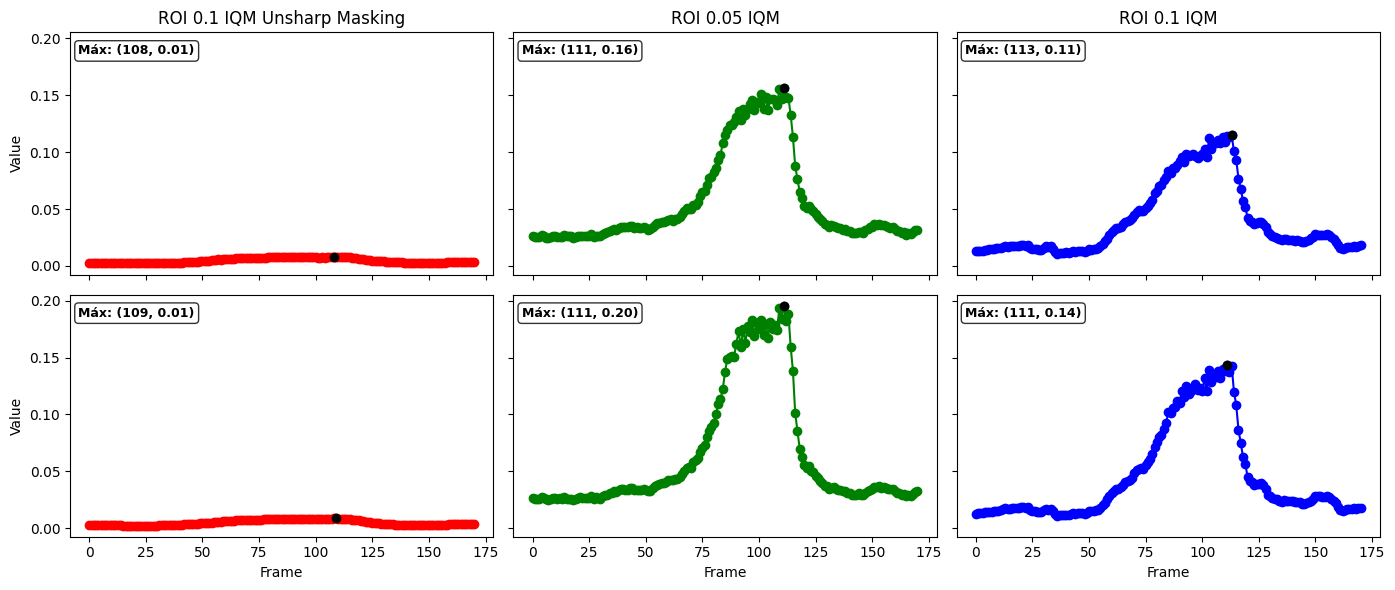

In [ ]:

A = [item[0] for item in frames_quality_measure]
B = [item[1] for item in frames_quality_measure]
C = [item[2] for item in frames_quality_measure]

# Extraer valores de la segunda lista
A2 = [item[0] for item in frames_quality_measure_unsharp]
B2 = [item[1] for item in frames_quality_measure_unsharp]
C2 = [item[2] for item in frames_quality_measure_unsharp]

x = list(range(len(frames_quality_measure)))  # eje x

# Función auxiliar para marcar el máximo
def marcar_max(ax, x_vals, y_vals):
    max_idx = np.argmax(y_vals)
    x_max = x_vals[max_idx]
    y_max = y_vals[max_idx]
    ax.plot(x_max, y_max, 'o', color='black')  # marcar el punto máximo

    # Agregar texto en una esquina fija del gráfico
    ax.text(
        0.02, 0.95,
        f'Máx: ({x_max}, {y_max:.2f})',
        transform=ax.transAxes,
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8),
        verticalalignment='top',
        horizontalalignment='left'
    )

# Crear subplots con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)

# Primera fila: frames_quality_measure
axes[0, 0].plot(x, A, marker='o', color='r')
axes[0, 0].set_title('IQM original')
axes[0, 0].set_ylabel('Value')
marcar_max(axes[0, 0], x, A)

axes[0, 1].plot(x, B, marker='o', color='g')
axes[0, 1].set_title('ROI 0.05 IQM')
marcar_max(axes[0, 1], x, B)

axes[0, 2].plot(x, C, marker='o', color='b')
axes[0, 2].set_title('ROI 0.1 IQM')
marcar_max(axes[0, 2], x, C)

# Segunda fila: frames_quality_measure_2
axes[1, 0].plot(x, A2, marker='o', color='r')
axes[0, 0].set_title('IQM original Unsharp Masking')
axes[1, 0].set_xlabel('Frame')
axes[1, 0].set_ylabel('Value')
marcar_max(axes[1, 0], x, A2)

axes[1, 1].plot(x, B2, marker='o', color='g')
axes[0, 0].set_title('ROI 0.05 Unsharp Masking')
axes[1, 1].set_xlabel('Frame')
marcar_max(axes[1, 1], x, B2)

axes[1, 2].plot(x, C2, marker='o', color='b')
axes[0, 0].set_title('ROI 0.1 IQM Unsharp Masking')
axes[1, 2].set_xlabel('Frame')
marcar_max(axes[1, 2], x, C2)

plt.tight_layout()
plt.show()